<a href="https://colab.research.google.com/github/rkhushii/Codsoft-ML-task-1/blob/main/titanic_survival_predictions_beginner.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2) Read in and Explore the Data
It's time to read in our training and testing data using `pd.read_csv`, and take a first look at the training data using the `describe()` function.

In [74]:
#importing train and test CSV files
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [75]:

print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [76]:

train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
323,324,1,2,"Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...",female,22.0,1,1,248738,29.0000,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C
190,191,1,2,"Pinsky, Mrs. (Rosa)",female,32.0,0,0,234604,13.0000,NaN,S


In [77]:

train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [78]:

print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [79]:
print(train["Survived"].head())

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


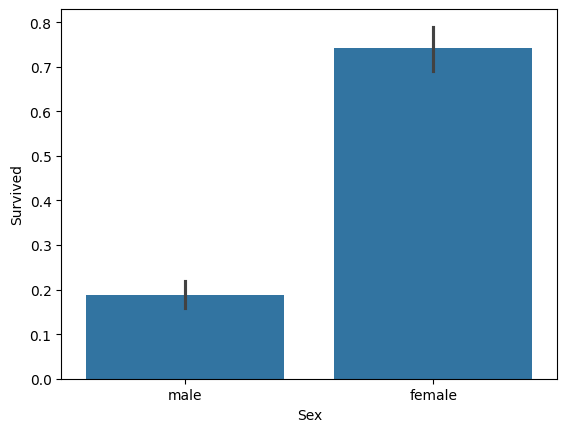

In [80]:
#bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)


print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


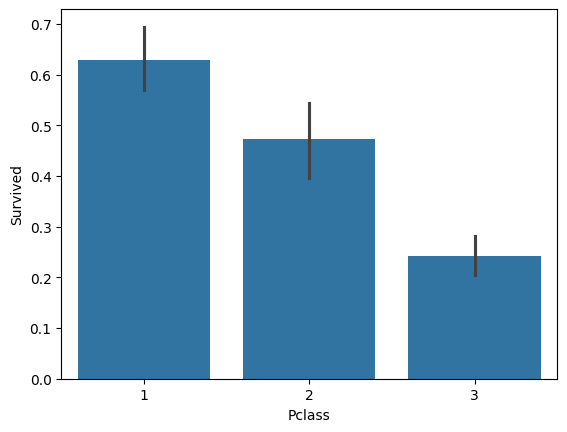

In [81]:
#bar plot of survival by Pclass
sns.barplot(x="Pclass", y="Survived", data=train)


print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

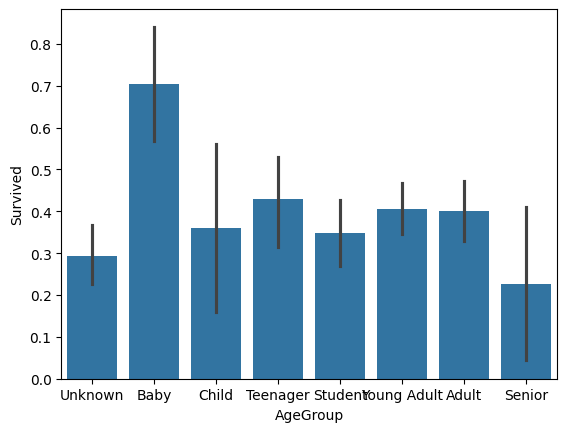

In [82]:

train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

In [83]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN


In [84]:
#dropping the features
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)


In [85]:
#fill in the missing values
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [86]:

train = train.fillna({"Embarked": "S"})

In [87]:
combine = [train, test]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [88]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [89]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,1


In [90]:
mr_age = train[train["Title"] == 1]["Age"].mode() #Young Adult
miss_age = train[train["Title"] == 2]["Age"].mode() #Student
mrs_age = train[train["Title"] == 3]["Age"].mode() #Adult
master_age = train[train["Title"] == 4]["Age"].mode() #Baby
royal_age = train[train["Title"] == 5]["Age"].mode() #Adult
rare_age = train[train["Title"] == 6]["Age"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

for x in range(len(train["Age"])):
    if train["Age"][x] == "Unknown":
        train["Age"][x] = age_title_mapping[train["Title"][x]]

for x in range(len(test["Age"])):
    if test["Age"][x] == "Unknown":
        test["Age"][x] = age_title_mapping[test["Title"][x]]

In [91]:

age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['Age'] = train['Age'].map(age_mapping)
test['Age'] = test['Age'].map(age_mapping)

train.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,NaN,1,0,7.2500,S,Student,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,NaN,1,0,71.2833,C,Adult,3
2,3,1,3,"Heikkinen, Miss. Laina",female,NaN,0,0,7.9250,S,Young Adult,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,NaN,1,0,53.1000,S,Young Adult,3
4,5,0,3,"Allen, Mr. William Henry",male,NaN,0,0,8.0500,S,Young Adult,1


In [92]:
train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [93]:

sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,S,Student,1
1,2,1,1,1,1,0,71.2833,C,Adult,3
2,3,1,3,1,0,0,7.9250,S,Young Adult,2
3,4,1,1,1,1,0,53.1000,S,Young Adult,3
4,5,0,3,0,0,0,8.0500,S,Young Adult,1


In [94]:

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,Title
0,1,0,3,0,1,0,7.2500,1,Student,1
1,2,1,1,1,1,0,71.2833,2,Adult,3
2,3,1,3,1,0,0,7.9250,1,Young Adult,2
3,4,1,1,1,1,0,53.1000,1,Young Adult,3
4,5,0,3,0,0,0,8.0500,1,Young Adult,1


In [95]:

for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] #Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)


train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])


train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [96]:
train.head()


,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,1,0,3,0,1,0,1,Student,1,1
1,2,1,1,1,1,0,2,Adult,3,4
2,3,1,3,1,0,0,1,Young Adult,2,2
3,4,1,1,1,1,0,1,Young Adult,3,4
4,5,0,3,0,0,0,1,Young Adult,1,2


In [97]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
0,892,3,0,0,0,3,Young Adult,1,1
1,893,3,1,1,0,1,Adult,3,1
2,894,2,0,0,0,3,Senior,1,2
3,895,3,0,0,0,1,Young Adult,1,2
4,896,3,1,1,1,1,Student,3,2


In [106]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [107]:
x_train

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
172,3,1,1,1,1,Baby,2,2
447,1,0,0,0,1,Young Adult,1,3
597,3,0,0,0,1,Adult,1,1
204,3,0,0,0,1,Teenager,1,2
240,3,1,1,0,2,Unknown,2,2
...,...,...,...,...,...,...,...,...
835,1,1,1,1,2,Adult,2,4
192,3,1,1,0,1,Student,2,1
629,3,0,0,0,3,Unknown,1,1
559,3,1,1,0,1,Adult,3,3


In [99]:
x_train = pd.DataFrame(x_train)
x_train = x_train.apply(pd.to_numeric, errors='coerce')

In [108]:
x_train

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
172,3,1,1,1,1,Baby,2,2
447,1,0,0,0,1,Young Adult,1,3
597,3,0,0,0,1,Adult,1,1
204,3,0,0,0,1,Teenager,1,2
240,3,1,1,0,2,Unknown,2,2
...,...,...,...,...,...,...,...,...
835,1,1,1,1,2,Adult,2,4
192,3,1,1,0,1,Student,2,1
629,3,0,0,0,3,Unknown,1,1
559,3,1,1,0,1,Adult,3,3


In [109]:
age_counts = x_train.groupby(['AgeGroup']).size()
print(age_counts)
# Find the age group with the most people
#most_common_age_group = age_counts.sort_values(ascending=False).index[0]

# Print the most common age group
#print(f"The age group with the most people is: {most_common_age_group}")

AgeGroup
Unknown        135
Baby            38
Child           19
Teenager        54
Student        103
Young Adult    171
Adult          157
Senior          17
dtype: int64


In [110]:
replacements={'Unknown':0,'Baby':1,'Child':2,'Teenager':3,'Student':4,'Young Adult':5,'Adult':6,'Senior':7}

In [111]:
x_train['AgeGroup'] = x_train["AgeGroup"].replace(replacements)

In [112]:
x_train

,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,Title,FareBand
172,3,1,1,1,1,1,2,2
447,1,0,0,0,1,5,1,3
597,3,0,0,0,1,6,1,1
204,3,0,0,0,1,3,1,2
240,3,1,1,0,2,0,2,2
...,...,...,...,...,...,...,...,...
835,1,1,1,1,2,6,2,4
192,3,1,1,0,1,4,2,1
629,3,0,0,0,3,0,1,1
559,3,1,1,0,1,6,3,3


In [113]:
from sklearn import tree
decisiontree = tree.DecisionTreeClassifier()


In [114]:
clf = tree.DecisionTreeClassifier()

# Train the classifier
clf = clf.fit(x_train,y_train)

# Make predictions
predictions = clf.predict(x_train)

# Evaluate the accuracy of the classifier
accuracy = clf.score(x_train,y_train)

# Print the accuracy
print(f"Accuracy: {accuracy}")

Accuracy: 0.909221902017291


## Sources:
* [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
* [Scikit-Learn ML from Start to Finish](https://www.kaggle.com/jeffd23/scikit-learn-ml-from-start-to-finish?scriptVersionId=320209)

Any and all feedback is welcome!